# Análisis de datos y Regresión lineal

* Modelo de ventas basado en la inversión en medios.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import statsmodels.formula.api as smf

In [3]:
mainpath = "/Users/michael/Documents/Clases Python/ProyestosPersonales/ADS/Data/"
filename = "Advertising.csv"
fullpath = os.path.join(mainpath,filename)
fullpath

'/Users/michael/Documents/Clases Python/ProyestosPersonales/ADS/Data/Advertising.csv'

In [6]:
df = pd.read_csv(fullpath)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [213]:
type(df)

pandas.core.frame.DataFrame

In [214]:
#Tipo de datos de cada columna
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [215]:
df.shape

(200, 4)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [217]:
#Registros nulos
pd.isnull(df).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [218]:
#Matriz de correlación
pd.DataFrame.corr(df)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## Totales por columnas

In [80]:
#Inversión en TV
inv_tv = df['TV'].sum()
inv_tv

29408.5

In [81]:
#Inversión en Radio
inv_radio = df['Radio'].sum()
inv_radio

4652.800000000001

In [82]:
#Inversión en Newspaper
inv_newspapaer = df['Newspaper'].sum()
inv_newspapaer

6110.799999999999

In [29]:
#Ventas
df['Sales'].sum()

2804.5

## Análisis gráfico

### Pie chart

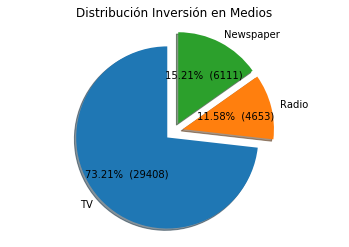

In [139]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'TV', 'Radio', 'Newspaper'
sizes = [inv_tv, inv_radio, inv_newspapaer]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct=make_autopct(sizes),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribución Inversión en Medios')

plt.show()

### Histogramas de frecuencias y BoxPlots

Text(0, 0.5, 'Frecuencia')

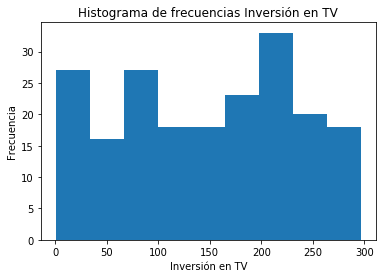

In [129]:
%matplotlib inline

k = int(np.ceil(1+np.log2(len(df)))) # Regla de Sturges
plt.hist(df['TV'], bins = k)
plt.title('Histograma de frecuencias Inversión en TV')
plt.xlabel('Inversión en TV')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Inversión en TV')

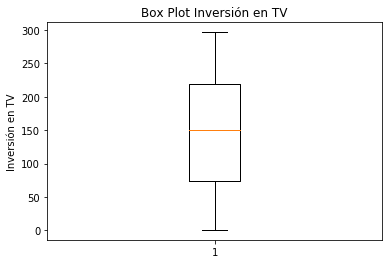

In [41]:
plt.boxplot(df['TV'])
plt.title('Box Plot Inversión en TV')
plt.ylabel('Inversión en TV')

Text(0, 0.5, 'Frecuencia')

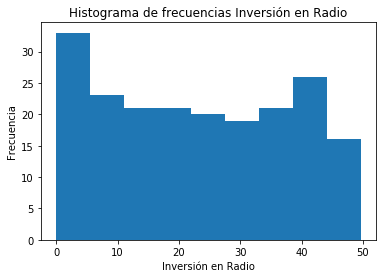

In [42]:
%matplotlib inline

k = int(np.ceil(1+np.log2(len(df)))) # Regla de Sturges
plt.hist(df['Radio'], bins = k)
plt.title('Histograma de frecuencias Inversión en Radio')
plt.xlabel('Inversión en Radio')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Inversión en Radio')

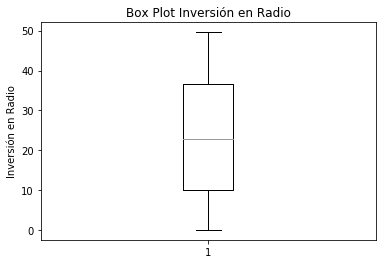

In [43]:
plt.boxplot(df['Radio'])
plt.title('Box Plot Inversión en Radio')
plt.ylabel('Inversión en Radio')

Text(0, 0.5, 'Frecuencia')

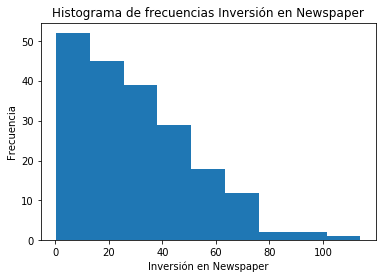

In [44]:
%matplotlib inline

k = int(np.ceil(1+np.log2(len(df)))) # Regla de Sturges
plt.hist(df['Newspaper'], bins = k)
plt.title('Histograma de frecuencias Inversión en Newspaper')
plt.xlabel('Inversión en Newspaper')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Inversión en Newspaper')

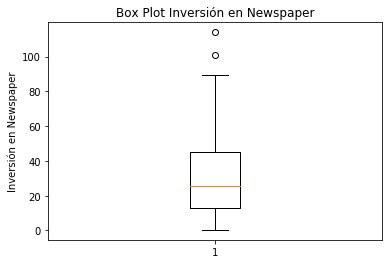

In [45]:
plt.boxplot(df['Newspaper'])
plt.title('Box Plot Inversión en Newspaper')
plt.ylabel('Inversión en Newspaper')

### Análisis de dispersión

Text(0, 0.5, 'Inversión en TV')

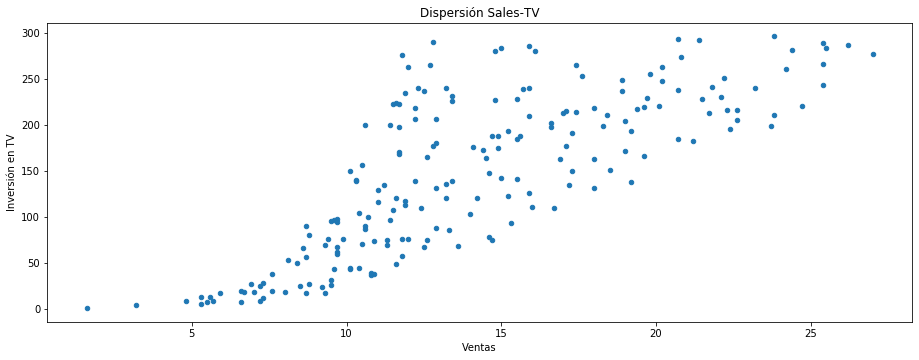

In [58]:
df.plot(kind = 'scatter', x = 'Sales', y = 'TV',figsize = (15.5,5.5))
plt.title('Dispersión Sales-TV')
plt.xlabel('Ventas')
plt.ylabel('Inversión en TV')

Text(0, 0.5, 'Inversión en Radio')

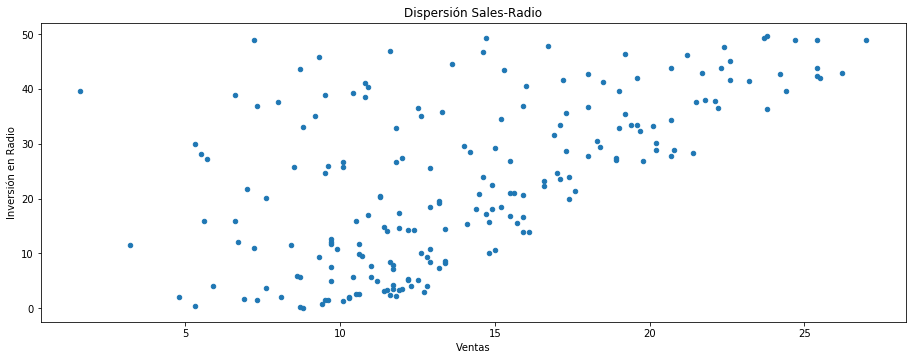

In [59]:
df.plot(kind = 'scatter', x = 'Sales', y = 'Radio',figsize = (15.5,5.5))
plt.title('Dispersión Sales-Radio')
plt.xlabel('Ventas')
plt.ylabel('Inversión en Radio')

Text(0, 0.5, 'Inversión en Newspaper')

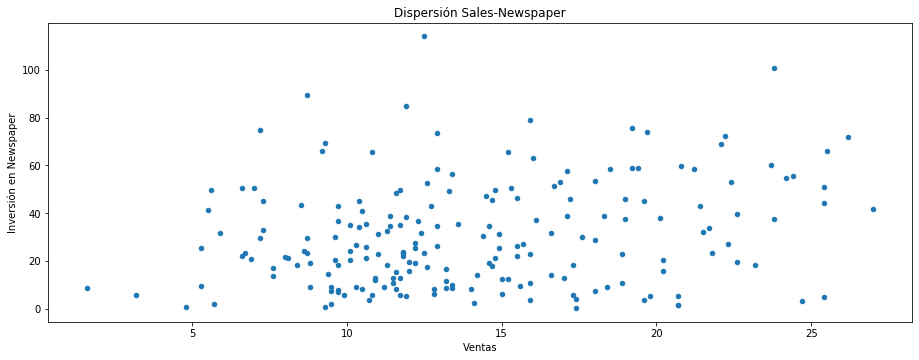

In [60]:
df.plot(kind = 'scatter', x = 'Sales', y = 'Newspaper',figsize = (15.5,5.5))
plt.title('Dispersión Sales-Newspaper')
plt.xlabel('Ventas')
plt.ylabel('Inversión en Newspaper')

### Matriz de correlación

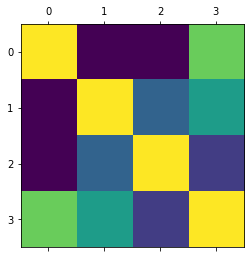

In [125]:
plt.matshow(pd.DataFrame.corr(df))

# Concluisiones preliminares análisis gráfico

* Existe una relación lineal positiva fuerte entre Sales y TV, la corelación entre ambas es de 78% aproximadamente.
* La variable en la que más se invierte es TV (73,2%).
* La segunda variable en la que más se invierte en Newspaper (6.111) y es la que presenta mayor dispersión.
* Newspaper y Radio presentan un correlación moderada igual a 35%.



## Linear model

In [141]:
lm = smf.ols(formula= 'Sales~TV', data=df).fit()

In [142]:
lm

In [143]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería

Sales = 7.03 + 0.04*TV

Por cada 100 unidades monetarias invertidas en TV las ventas crecen 4,7 unidades monetarias aproximadamente.

In [144]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

El p-value de TV es significativo (menor a 5%), lo que quiere decir que para esta variable se cumple la hipótesis alternativa de que Ho != 0

In [145]:
#R2

lm.rsquared

0.611875050850071

In [146]:
#R2 ajustado

lm.rsquared_adj

0.6099148238341623

In [149]:
# Resumen

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.47e-42
Time:                        11:10:26   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predecir valores futuros

In [150]:
sales_pred = lm.predict(pd.DataFrame(df['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

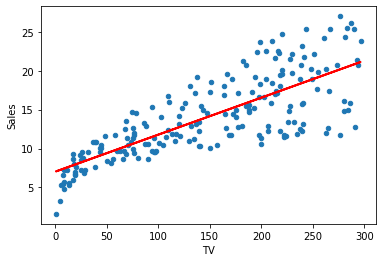

In [153]:
%matplotlib inline

df.plot(kind='scatter', x = 'TV', y='Sales')
plt.plot(pd.DataFrame(df['TV']), sales_pred, c='red', linewidth = 2)

In [154]:
# Añadir columna de las predicciones al DataFrame

df['sales_pred'] = 7.032594 + 0.047537*df["TV"]

In [161]:
#RSE:Residual square error

df["RSE"] = (df["Sales"]-df["sales_pred"])**2

In [162]:
#SSD = sum squared difference

SSD = sum(df['RSE'])
SSD

2102.5305838896525

El error es grande

In [163]:
RSE = np.sqrt(SSD/(len(df)-3))
RSE

3.2669166014237545

La desviación típica del modelo es de 3,2 ventas por encima y por debajo

In [165]:
# Ventas promedio
sales_m = np.mean(df['Sales'])
sales_m

14.022500000000003

Las ventas promedio del modelo son de 14 unidades

In [167]:
#Error promedio
error = RSE/sales_m
error

0.23297675888206482

Aproximadamente el 23% del modelo no es explicado 

## Histograma de los errores

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

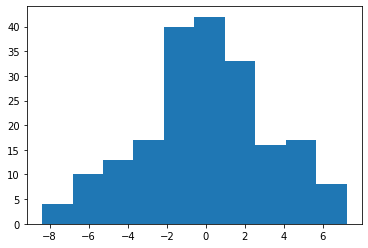

In [168]:
plt.hist(df['Sales']- df['sales_pred'])

Los errores del modelo se distribuyen como una Normal Standart de media = 0 y Desviación típica constante

# Concluisiones preliminares regresión lineal simple

* En un modelo simple Sales = a + bTV + e, los p valores son significatios (menor al 5%).
* La desviación típica del modelo es de 3,2 ventas por encima y por debajo.
* Las ventas promedio del modelo son de 14 unidades.
* Aproximadamente el 23% del modelo no es explicado.
* Los errores del modelo se distribuyen como una Normal Standart de media = 0 y Desviación típica constante.
* El R2 o bondad de ajuste es de 0,62 un valor medio uqe podría mejorar si se hacen ajustes al modelo.

# Mejorando el modelo de regresión lineal simple

* Agrego variables predictoras al modelo y evaluo los estadísticos resultantes para comprobar si existe una mejora

* Posibles combinaciones de modelos:

    * Salea ^TV
    * Sales ~Newspaper
    * Sales ~Radio
    * Sales~TV+Newspaper
    * Sales~TV-Radio
    * Sales~ newspaper-Radio
    * Sales~TV-Newspaper-Radio
    



# Metodología a implementar: 


* Agregar variables al modelo.

* Empezar con un modelo que incluya todas las variables e ir descartando aquellas cuyo p.value sea poco signficativo.

* Punto de inicio el modelo existente y agrego Newspaper



In [170]:
lm2 = smf.ols(formula = 'Sales~TV+Newspaper', data = df).fit()

In [171]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           3.95e-45
Time:                        11:44:39   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
sales_pred = lm2.predict(df[["TV","Newspaper"]])

In [187]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

## El modelo resultante sería:

* Sales = 5.7749 + 0.0469*TV + 0.0442 * Newspaper

In [172]:
lm2.rsquared

0.6458354938293271

In [173]:
lm2.rsquared_adj

0.6422399150864777

In [174]:
sales_pred = lm2.predict(df[["TV","Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [176]:
SSD = sum((df['Sales'] - sales_pred)**2)
SSD

1918.561811896827

In [177]:
RSE = np.sqrt(SSD/(len(df)-3)) # uso menos 3 porque es número de variables predictoras menos 1
RSE

3.120719860252885

In [178]:
error = RSE/sales_m
error

0.22255089037282116

# Concluisiones preliminares regresión lineal multiple

* En un modelo de regresión múltiple - Sales = a + b1*TV + b2*newspaper + e, los p valores son significatios (menor al 5%).
* La desviación típica del modelo es de 3,1 ventas por encima y por debajo.
* Aproximadamente el 22% del modelo no es explicado.
* No se evidencia mucha mejora en el modelo al agregar la variable Newspaper.

In [183]:
#Añadiendo la Radio como variabe predictora

lm3 = smf.ols(formula='Sales~TV+Radio', data = df).fit()

In [184]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           4.83e-98
Time:                        11:58:39   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## El modelo resultante sería:

* Sales = 2.9211 + 0.0458*TV + 0.1880 * Radio

In [189]:
sales_pred = lm3.predict(df[['TV','Radio']])

In [190]:
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [191]:
SSD = sum((df['Sales'] - sales_pred)**2)
SSD

556.9139800676182

In [192]:
RSE = np.sqrt(SSD/(len(df)-3))
RSE

1.681360912508001

In [193]:
error = RSE/sales_m
error

0.11990450436855059

In [194]:
lm3.rsquared

0.8971942610828957

In [195]:
lm3.rsquared_adj

0.8961505479974429

# Concluisiones preliminares regresión lineal multiple

* En un modelo de regresión múltiple - Sales = a + b1*TV + b2*Radio + e, los p valores son significatios (menor al 5%).
* El error standart disminuye con respecto a los modelos anterioes.
* El R2 simple y ajustado aumentan.
* Este es el mejor modelo hasta el momento.

In [196]:
#Añadiendo todas las variables

lm4 = smf.ols(formula= 'Sales~TV+Radio+Newspaper', data=df).fit()

In [197]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        12:05:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## El modelo resultante sería:

* Sales = 2.9389 + 0.0458*TV + 0.1885 * Radio - 0.0010 * Newspaper

* El coeficiente de newspaper es negativo lo que va en contra del resultado esperado que sería positivo, ya que en teoría se esperarían más ventas por cada unidad monetaria invertida en Newspaper.

* El p-value de Newsppaer es poco significativo (mayor a 5%), lo que implica que para esta variable se acepta la Ho de que la variable es cero.

* El intérvalo de confianza para newspaper incluye al cero, lo que valida que esta variable debe salir del modelo.

In [200]:
sales_pred = lm4.predict(df[['TV','Radio','Newspaper']])

In [201]:
sales_pred

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [202]:
SSD = sum((df['Sales']-sales_pred)**2)
SSD

556.8252629021874

In [203]:
RSE = np.sqrt(SSD/(len(df)-4))
RSE

1.6855103734147445

In [204]:
error = RSE/sales_m
error

0.12020041885646242

In [205]:
lm4.rsquared

0.8972106381789522

In [206]:
lm4.rsquared_adj

0.8956373316204668

# Concluisiones preliminares regresión lineal multiple con todas las variables

* En un modelo de regresión múltiple - Sales = a + b1*TV + b2*Radio +b3*Newspaper + e, los p valores son significativos (menor al 5%) con execpción de la variable Newspaper.
* El error standart aumenta con respecto al modelo anterior.
* El R2 simple y ajustado disminuyen.
* La variable newspaper es candidata a salir del modelo ya que el beneficio parcial de incluirla al modelo resta poder predictivo y lo hace menos eficaz.

La razon por la que agregar a la variable Newspaper al modelo haya generado problemas se debe a la Multicolinealidad, es decir, existe alta correlación entre las variables predictoras del modelo

## Factor de inflación de la varianza

* Vif = 1: las variables no están correlacionadas.
* VIF < 5: las variables tienen una correlación moderada y se pueden quedar en el modelo .
* VIF > 5: las variables están altamente correlacionadas y deben desaparecer del modelo.

In [207]:
# Newspaper ~ TV + Radio -> R2 VIF = 1/(1-R2)

lm_n = smf.ols(formula = "Newspaper~TV + Radio", data = df).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [208]:
# TV ~ Newspaper + Radio

lm_tv = smf.ols(formula = "TV ~ Newspaper + Radio", data = df).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [209]:
# Radio ~ TV + Newspaper

lm_r = smf.ols(formula = "Radio ~ TV + Newspaper", data = df).fit()
rsquared_r =  lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

# Comentarios finales y Modleo Final

* Newspaper y Radio tienen un VIF similar por lo que están correlacionadas entre si pero no con TV.
* El modelo con TV y Radio es mejor porque tiene mayor precisión.
* Modelo final es lm3 --- Sales = 2.9211 + 0.0458*TV + 0.1880 * Radio

# Validación del Modelo

## Dividir el Dataset en conjunto de entrenaiento y testing


* El objetivo es dividir en el dataset en dos conjuntos indeoendientes de manera que al ejecutarlo en un dataset que no conozca pueda generar buenas estimaciones.

In [21]:
a = np.random.randn(len(df)) #construyo una distribución uniforme con el tamaño de mi mustra

(array([ 2.,  6.,  8., 29., 49., 49., 28., 19.,  8.,  2.]),
 array([-3.01229507, -2.4157929 , -1.81929072, -1.22278855, -0.62628638,
        -0.02978421,  0.56671797,  1.16322014,  1.75972231,  2.35622449,
         2.95272666]),
 <a list of 10 Patch objects>)

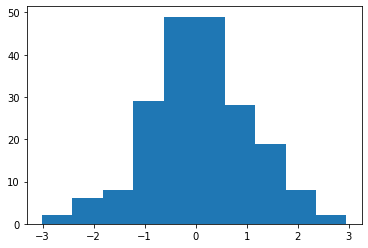

In [22]:
plt.hist(a)

In [23]:
#Tomo 80% training y 20% testing

check = (a < 0.8)
training = df[check]
testing = df[~check]

In [24]:
len(training), len(testing), len(df)

(158, 42, 200)

In [13]:
# Genero el modelo en el conjunto training y luego lo pruebo en testing.

lm = smf.ols(formula = 'Sales~TV+Radio', data = training).fit()

In [14]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     755.7
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.23e-79
Time:                        09:10:45   Log-Likelihood:                -288.05
No. Observations:                 154   AIC:                             582.1
Df Residuals:                     151   BIC:                             591.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9550      0.310      9.530      0.000       2.342       3.568
TV             0.0456      0.001     30.460      0.000       0.043       0.049
Radio          0.1881      0.009     22.034      0.000       0.171       0.205
==============================================================================
Omnibus:                       16.300   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.349
Skew:                          -0.832   Prob(JB):                     0.000104
Kurtosis:                       3.301   Cond. No.                         409.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo ejecutado con el Dataset trainning

* Sales = 2.9550 + 0.0456 * TV + 0.1881 * Radio

## Validación del modelo con el conjunto de testing

In [16]:
#Predecir los valores de ventas con los datos  que no he usado

sales_pred = lm.predict(testing) # Aplico el modelo a datos que no conoce
sales_prede

2      12.372349
10      7.063027
11     17.268996
17     23.247495
28     19.408569
33     18.840168
35     16.995654
37     15.655290
38      9.943733
40     16.392389
43     13.979112
44      8.934019
55     21.324661
57     12.782980
61     22.912994
63     13.209693
70     17.798140
71     10.656370
72     10.384504
74     17.322495
86     11.609670
94     10.490398
100    13.915570
105    17.975988
107     7.137886
109    19.672226
110    14.804229
111    21.134399
117     6.592860
124    19.505525
127     6.615866
129     7.932333
130    10.434353
139    19.651235
149     9.847508
152    16.356784
154    15.495697
160    14.233096
164    11.069386
165    14.298640
169    17.925944
172     7.629787
177    12.191024
183    24.169933
187    17.075637
194    16.483506
dtype: float64

In [17]:
# Comprobar como se separan los conjuntos entre si

SSD = sum((testing['Sales']-sales_pred)**2)
SSD

177.07512631470075

In [18]:
RSE = np.sqrt(SSD/(len(testing)-3))
RSE

2.0292920424042307

In [19]:
sales_mean = np.mean(testing['Sales'])
sales_mean

14.49565217391304

In [20]:
error = RSE/sales_mean
error

0.13999315229543285

## Conclusiones validación del modelo

* El modelo generaliza bastante bien en ambos conjuntos de datos al igual que lo hacia con el total de los datos.
* El modelo no sufre de problema de overfitting. 


# Resumen de todos los modelos

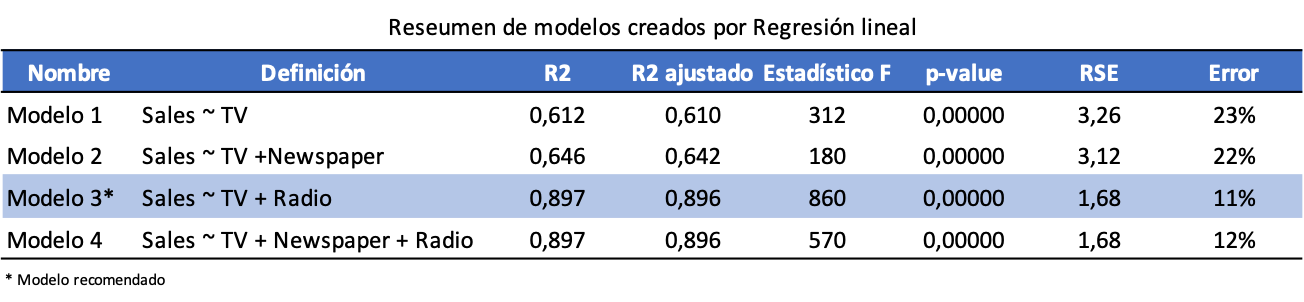

In [6]:
from IPython.display import Image
Image(filename='/Users/michael/Documents/Clases Python/ProyestosPersonales/ADS/image/Resumen_linealRegresion.png')

# Conclusiones finales

* R2: siempre va a incrementar cuando se agregan nuevas variables predictoras al modelo, sin embargo, esto no significa que el modelo sea más eficiente, por esto hay que ver el R2 ajustado el cual penaliza la inclusión de una nueva variable. por ejemplo al agregar la variable Newspaper, éste indicador ha incrementado en menor medida que al agregar a la variable Radio al modelo.


* estadístico F: al añadir una variable predictora al modelo éste debería crecer debido a que el modelo es más eficiente, es decir, la variable aporta al conjunto de variables que entre si aportan más valor a predecir la variable dependiente, por lo que si éste decrece al agregar una nueva variable es sinónimo de que dicha variable no aporta al modelo.


* P-value : cuanto menor sea el p valor para estimar de las variables predictoras mejor será añadir esa variable predictora al modelo.


* RSE: el error standart de los residuos, a medida que se agregan variables predictoras buenas este error debería disminuir, por lo tanto si al agregar una nueva variable predictora si RSE incrementa, entonces dicha variable no aporta al modelo.


* error: porcentaje de datos que el modelo no es capaz de explicar, el modelo final debe ser aquel que tenga un error menor.